In [63]:
import pandas as pd
import os

# Load CSV
df = pd.read_csv('../data/sub_reg_nt_csvs/sub_reg_nt_51.csv')



In [64]:

# Sort by 'año' and 'semana' in ascending order
df = df.sort_values(by=['ano', 'semana'], ascending=[True, True])

# (Optional) Reset the index after sorting
df = df.reset_index(drop=True)

In [65]:
df.head(10)

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
0,LIMA,LIMA,ANCON,2000,1,51,150102,73,0,0,0,0,0,0
1,LIMA,LIMA,SANTA ROSA,2000,1,51,150139,32,0,0,0,0,0,0
2,LIMA,LIMA,ANCON,2000,2,51,150102,44,0,0,0,0,0,0
3,LIMA,LIMA,SANTA ROSA,2000,2,51,150139,14,0,0,0,0,0,0
4,LIMA,LIMA,ANCON,2000,3,51,150102,38,0,0,0,0,0,0
5,LIMA,LIMA,SANTA ROSA,2000,3,51,150139,16,0,0,0,0,0,0
6,LIMA,LIMA,ANCON,2000,4,51,150102,35,0,0,0,0,0,0
7,LIMA,LIMA,SANTA ROSA,2000,4,51,150139,9,0,0,0,0,0,0
8,LIMA,LIMA,ANCON,2000,6,51,150102,60,1,0,0,0,0,0
9,LIMA,LIMA,SANTA ROSA,2000,6,51,150139,5,0,0,0,0,0,0


In [66]:
df.tail(10)

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas
15122,LIMA,LIMA,INDEPENDENCIA,2023,52,51,150112,80,0,0,0,0,0,0
15123,LIMA,LIMA,JESUS MARIA,2023,52,51,150113,1,0,0,0,0,0,0
15124,LIMA,LIMA,LA VICTORIA,2023,52,51,150115,1,0,0,0,0,0,0
15125,LIMA,LIMA,LINCE,2023,52,51,150116,6,0,0,0,0,0,0
15126,LIMA,LIMA,LOS OLIVOS,2023,52,51,150117,62,1,3,0,0,0,0
15127,LIMA,LIMA,LURIN,2023,52,51,150119,1,0,0,0,0,0,0
15128,LIMA,LIMA,PUENTE PIEDRA,2023,52,51,150125,157,2,3,2,2,0,1
15129,LIMA,LIMA,RIMAC,2023,52,51,150128,84,0,0,0,0,0,0
15130,LIMA,LIMA,SAN MARTIN DE PORRES,2023,52,51,150135,136,0,0,0,0,0,0
15131,LIMA,LIMA,SANTA ROSA,2023,52,51,150139,44,0,0,0,0,0,0


In [67]:
df['sub_reg_nt'].value_counts()

sub_reg_nt
51    15132
Name: count, dtype: int64

Rango intercuartílico (IQR): 0.0


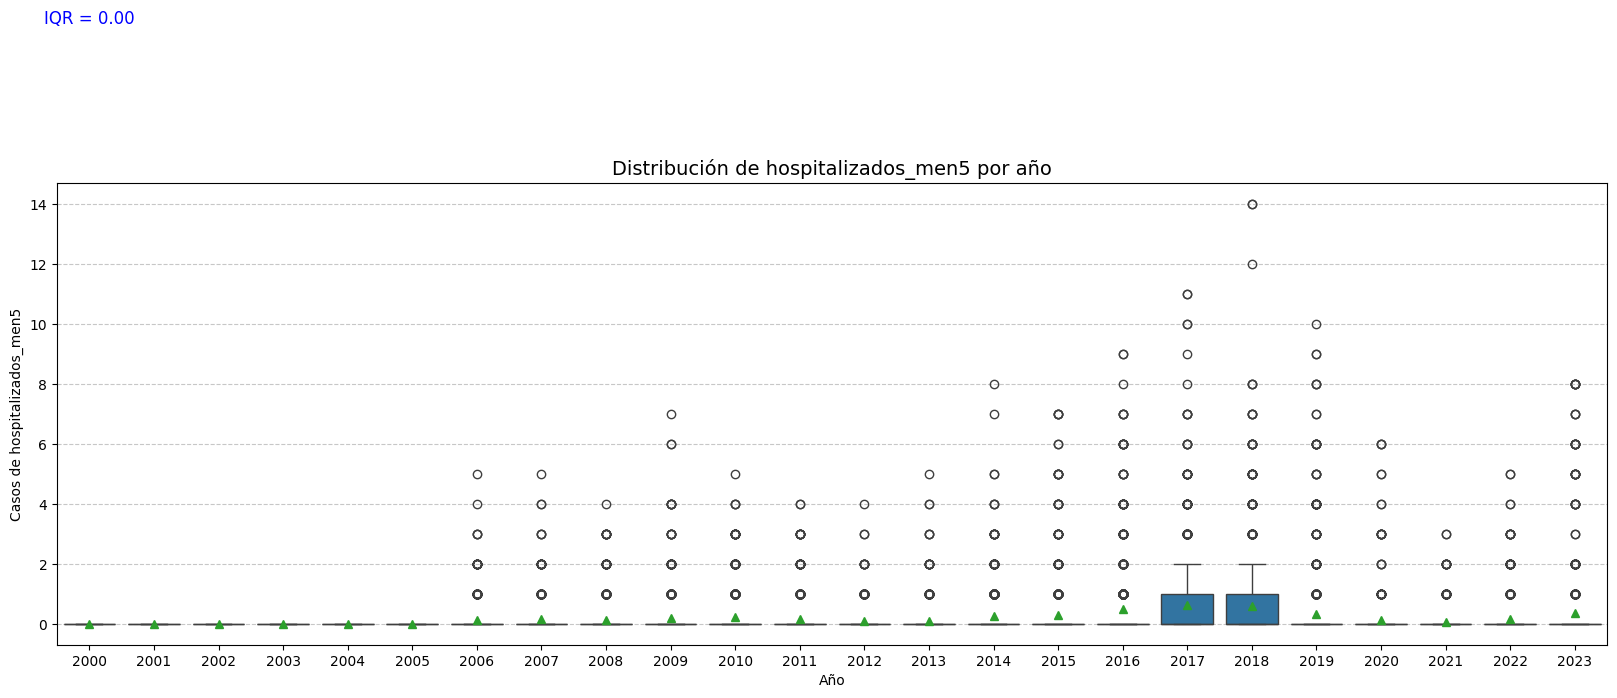

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular el rango intercuartílico (IQR)
Q1 = df['hospitalizados_men5'].quantile(0.25)
Q3 = df['hospitalizados_men5'].quantile(0.75)
IQR = Q3 - Q1

print(f"Rango intercuartílico (IQR): {IQR}")

# Crear el boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='ano', y='hospitalizados_men5', data=df, showmeans=True)

# Agregar anotación con el IQR
plt.text(0, Q3 + 20, f'IQR = {IQR:.2f}', ha='center', fontsize=12, color='blue')

plt.title('Distribución de hospitalizados_men5 por año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Casos de hospitalizados_men5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [69]:
df.query('ano == 2000 and hospitalizados_men5 > 2')

,departamento,provincia,distrito,ano,semana,sub_reg_nt,ubigeo,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas


In [70]:
# Función para reemplazar los 3 valores más altos por el valor anterior
def ajustar_outliers(grupo):
    sorted_vals = grupo.sort_values()
    if sorted_vals.nunique() > 3:
        valor_anterior = sorted_vals.iloc[-4]  # cuarto valor más alto
        top3_indices = sorted_vals.tail(3).index  # índices de los 3 más altos
        grupo.loc[top3_indices] = valor_anterior
    return grupo

# Aplicar directamente sobre el DataFrame original
df['hospitalizados_men5'] = df.groupby('ano')['hospitalizados_men5'].transform(ajustar_outliers)


Rango intercuartílico (IQR): 0.0


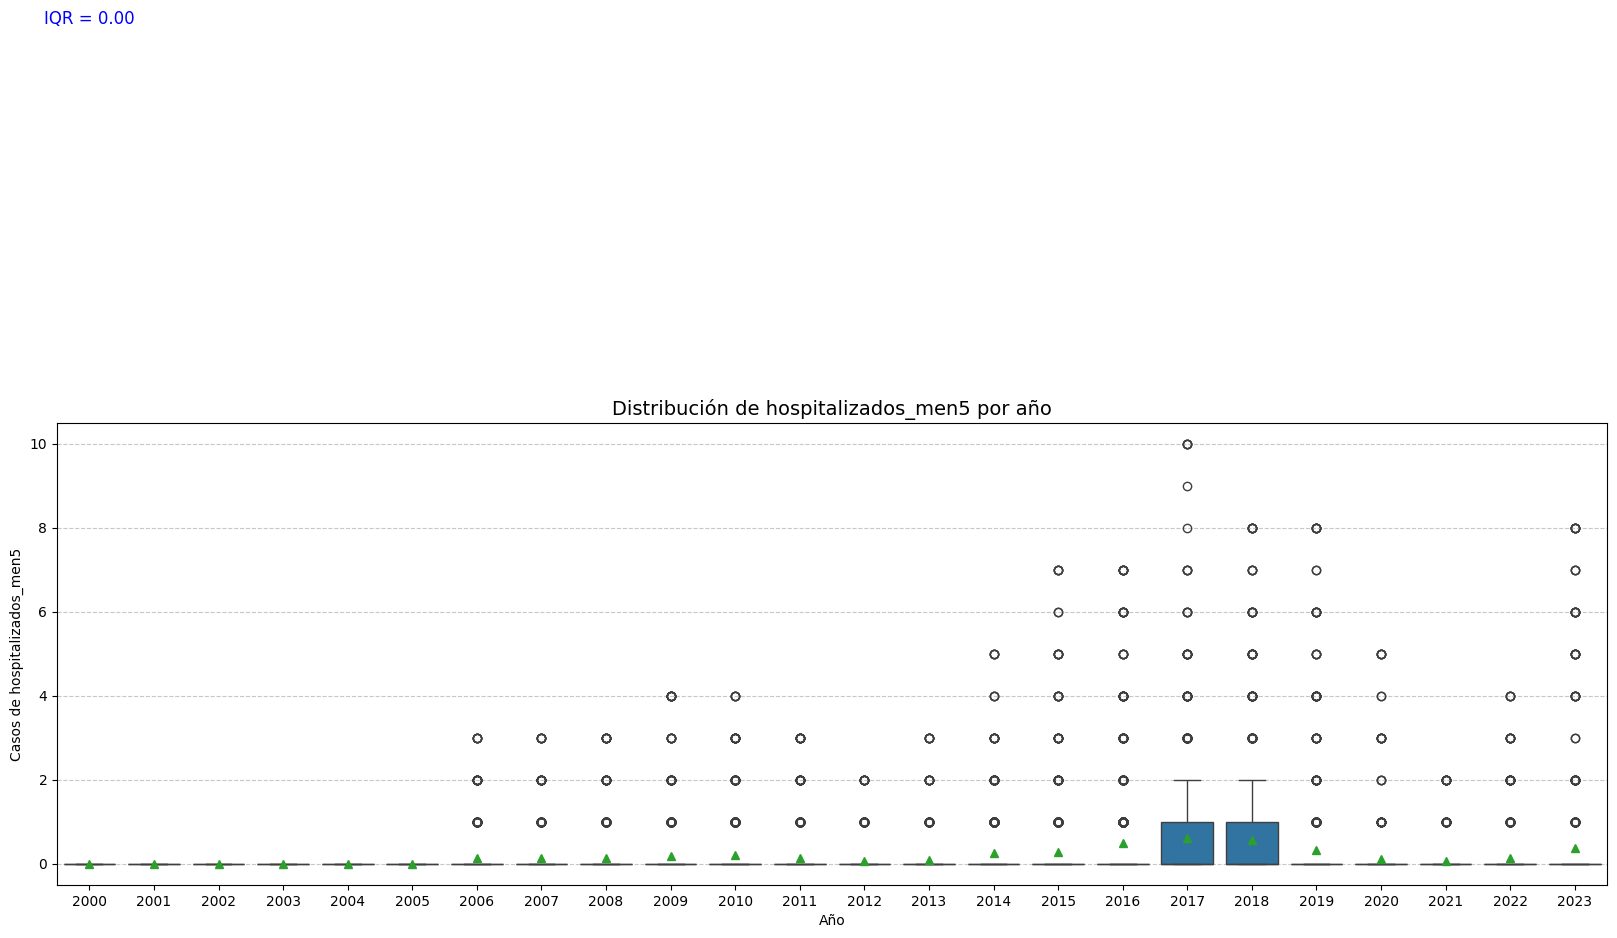

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular el rango intercuartílico (IQR)
Q1 = df['hospitalizados_men5'].quantile(0.25)
Q3 = df['hospitalizados_men5'].quantile(0.75)
IQR = Q3 - Q1

print(f"Rango intercuartílico (IQR): {IQR}")

# Crear el boxplot
plt.figure(figsize=(20, 6))
sns.boxplot(x='ano', y='hospitalizados_men5', data=df, showmeans=True)

# Agregar anotación con el IQR
plt.text(0, Q3 + 20, f'IQR = {IQR:.2f}', ha='center', fontsize=12, color='blue')

plt.title('Distribución de hospitalizados_men5 por año', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Casos de hospitalizados_men5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [72]:
# Asegurar nombre de columna
year_col = 'ano'

# Crear carpeta de salida si no existe
output_folder = '../data/sub_reg_nt_csvs_consolidados'
os.makedirs(output_folder, exist_ok=True)

# --- INICIO DE LA MODIFICACIÓN ---

# Seleccionar todas las columnas numéricas para sumar, excluyendo las de agrupación, 'sub_reg_nt' y 'ubigeo'
columnas_a_sumar = df.select_dtypes(include='number').columns.drop([year_col, 'semana', 'sub_reg_nt', 'ubigeo'])

# Crear el diccionario de agregaciones
# A todas las columnas numéricas seleccionadas se les aplicará la suma
agregaciones = {col: 'sum' for col in columnas_a_sumar}
# A 'sub_reg_nt' le pedimos que solo tome el primer valor, ya que todos son iguales
agregaciones['sub_reg_nt'] = 'first'

# Agrupar por año y semana, aplicando las agregaciones específicas
df_consolidado = df.groupby([year_col, 'semana'], as_index=False).agg(agregaciones)

# --- FIN DE LA MODIFICACIÓN ---


# Obtener el código de sub_reg_nt (ya que todos son iguales)
sub_reg = df['sub_reg_nt'].iloc[0]

# Guardar CSV consolidado
output_path = os.path.join(output_folder, f'df_consolidado_{sub_reg}.csv')
df_consolidado.to_csv(output_path, index=False)

print(f'✅ Archivo consolidado guardado en: {output_path}')

✅ Archivo consolidado guardado en: ../data/sub_reg_nt_csvs_consolidados\df_consolidado_51.csv


In [73]:
df_consolidado.tail(30)

,ano,semana,ira_no_neumonia,neumonias_men5,neumonias_60mas,hospitalizados_men5,hospitalizados_60mas,defunciones_men5,defunciones_60mas,sub_reg_nt
1206,2023,23,1431,26,11,10,5,0,0,51
1207,2023,24,1408,22,13,5,1,0,0,51
1208,2023,25,1501,23,24,8,5,0,2,51
1209,2023,26,1322,17,24,8,5,0,1,51
1210,2023,27,1526,25,15,9,2,0,2,51
1211,2023,28,1523,22,24,8,7,0,1,51
1212,2023,29,1495,31,22,9,7,0,1,51
1213,2023,30,1201,32,17,10,4,0,0,51
1214,2023,31,1301,30,33,9,3,0,2,51
1215,2023,32,1264,20,26,6,7,0,2,51
